In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Download yesterday's 3-minute data for NVDA
import datetime
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)


In [38]:
# Download intraday data for yesterday
data = yf.download("NVDA", interval="2m", start=str(yesterday), end=str(today))
data.to_csv("2mdata.csv")

/var/folders/3n/c2cyvjmd52585bcd83mjw9dw0000gp/T/ipykernel_53727/1072891610.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("NVDA", interval="2m", start=str(yesterday), end=str(today))
[*********************100%***********************]  1 of 1 completed


In [39]:
# 2. Calculate moving averages (on 2min data)
data["MA_20min"] = data["Close"].rolling(window=7).mean()      # 7x2min ≈ 14min window
data["MA_1hr"] = data["Close"].rolling(window=20).mean()       # 20x2min = 40min window ~ 1hr 


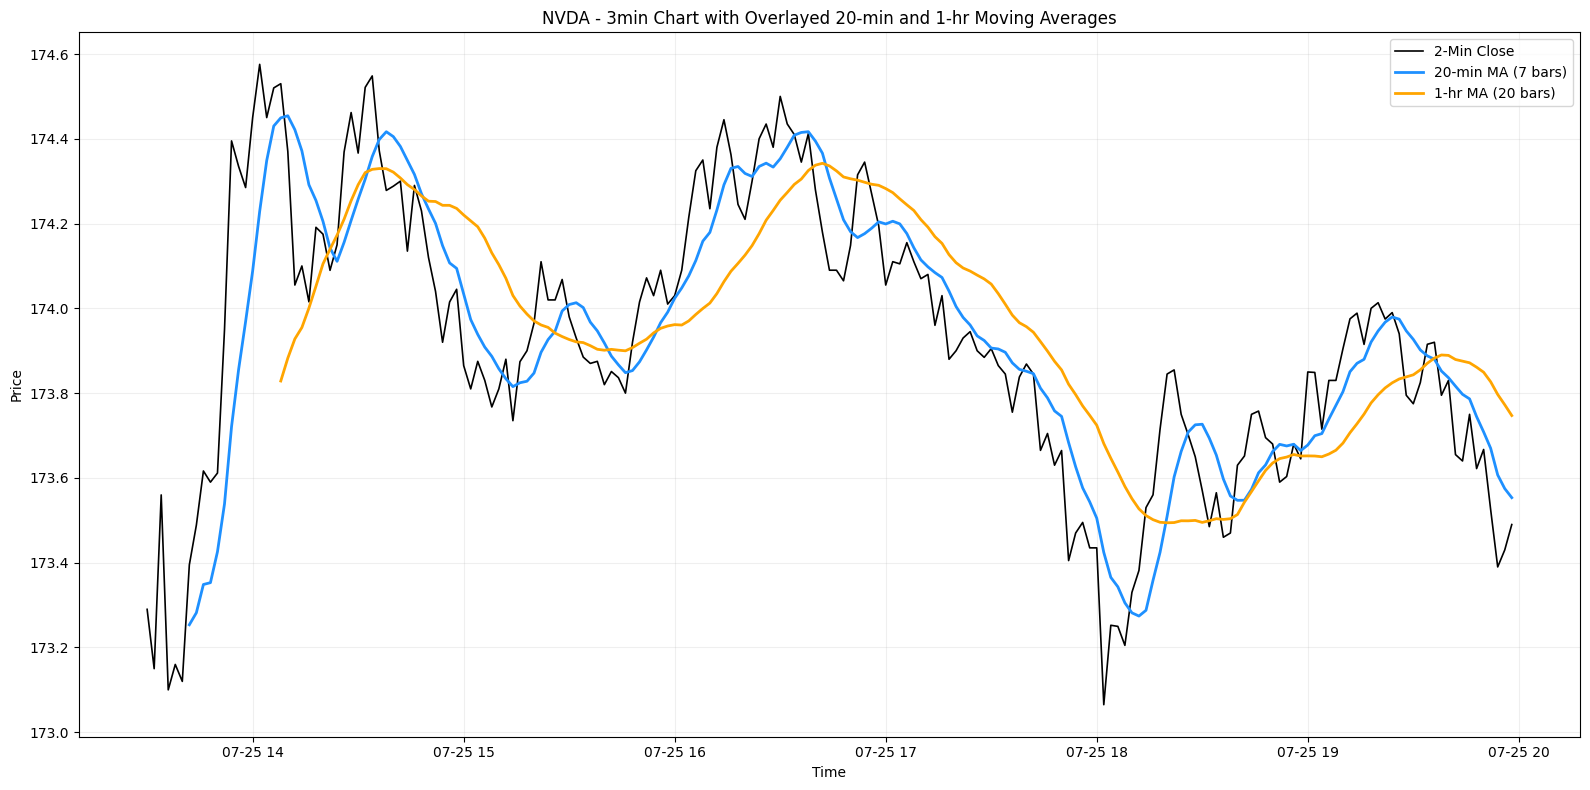

In [40]:
# 3. Plotting
plt.figure(figsize=(16, 8))
plt.plot(data.index, data["Close"], label="2-Min Close", linewidth=1.2, color="black")
plt.plot(data.index, data["MA_20min"], label="20-min MA (7 bars)", linewidth=2, color="dodgerblue")
plt.plot(data.index, data["MA_1hr"], label="1-hr MA (20 bars)", linewidth=2, color="orange")

plt.title("NVDA - 3min Chart with Overlayed 20-min and 1-hr Moving Averages")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()